# Transformers for Language Modeling

Welcome to the Transformers module! In this notebook, we’ll explore the core concepts of transformer architectures, learn how they work, and implement and fine-tune them using both Hugging Face and PyTorch.


### Learning Objectives

- Understand the motivation behind transformers.
- Implement self-attention and positional encoding.
- Explore the transformer architecture in detail.
- Use Hugging Face to fine-tune transformer models.
- Implement a mini transformer (NanoTransformer) from scratch.


## Self-Attention: Recap & Deeper Dive

### Why Attention?

In the last session, we saw how **attention mechanisms** help models **focus on relevant parts** of the input sequence. Unlike RNNs, which compress everything into a hidden state, attention allows dynamic interaction between tokens.

Example problem RNNs struggle with:

>"*The dog, which was barking loudly, ran after the mailman.*"
>
>An RNN may forget "the dog" by the time it needs to decide "ran".

**Attention solves this** by letting each word look at the **entire sequence** when generating an output.

### Self-Attention Intuition

Self-attention computes **relationships between all tokens** in a sequence. Each word decides *how much attention* to pay to other words.

Every token becomes:

* a **Query**: What am I looking for?
* a **Key**: What do I offer?
* a **Value**: What do I contribute if selected?

### Step-by-Step Example:

Let’s say we have 3 tokens in a sentence: `"The"`, `"cat"`, `"sat"`.

Assume their embeddings are:

In [1]:
import torch

# Each word represented by a 4D embedding
x = torch.tensor([
    [1.0, 0.0, 1.0, 0.0],  # "The"
    [0.0, 1.0, 0.0, 1.0],  # "cat"
    [1.0, 1.0, 1.0, 1.0],  # "sat"
])  # shape: (3, 4)


Define **Q**, **K**, **V** matrices (random small weights):

In [2]:
import torch.nn.functional as F

# Weight matrices (4 -> 2)
W_Q = torch.randn(4, 2)
W_K = torch.randn(4, 2)
W_V = torch.randn(4, 2)

Q = x @ W_Q  # shape: (3, 2)
K = x @ W_K
V = x @ W_V

Compute Attention Scores:

In [3]:
# Scaled dot-product attention
scores = Q @ K.T  # shape: (3, 3)
scaled_scores = scores / torch.sqrt(torch.tensor(Q.shape[-1], dtype=torch.float32))
weights = F.softmax(scaled_scores, dim=-1)

Get Final Output:

In [6]:
# Weighted sum of values
attn_output = weights @ V  # shape: (3, 2)
attn_output

tensor([[0.0044, 0.6334],
        [0.1284, 1.4725],
        [0.0459, 0.9282]])

#### Visualization: Token-to-Token Attention Heatmap

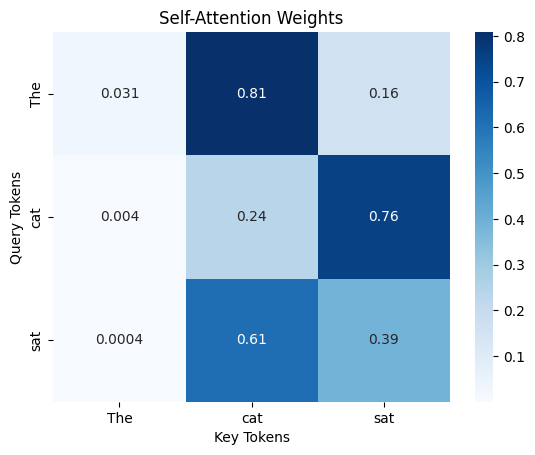

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(weights.detach().numpy(), annot=True, cmap="Blues", xticklabels=["The", "cat", "sat"], yticklabels=["The", "cat", "sat"])
plt.title("Self-Attention Weights")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


This heatmap shows how each token attends to the others. Diagonal dominance means the token mostly attends to itself.

### Resource: BertViz

Explore attention weights visualization with this interactive tutorial notebook: [BertViz Interactive Tutorial](https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing#scrollTo=T3H0qUZvPOP4)